In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm


In [2]:
data_url = "https://hbiostat.org/data/repo/diabetes.csv"
df = pd.read_csv(data_url)


In [3]:
# Inspect Data
print(df.head())
print(df.info())
print(df.describe())



     id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (t

In [4]:
print(df.isnull().sum())  # Check for missing values


id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [5]:
# Drop the 'id' column before handling missing values
df = df.drop(columns=['id'])


In [6]:
print(df.isnull().sum())

chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])


          Missing Values  Percentage
chol                   1    0.248139
hdl                    1    0.248139
ratio                  1    0.248139
glyhb                 13    3.225806
height                 5    1.240695
weight                 1    0.248139
frame                 12    2.977667
bp.1s                  5    1.240695
bp.1d                  5    1.240695
bp.2s                262   65.012407
bp.2d                262   65.012407
waist                  2    0.496278
hip                    2    0.496278
time.ppn               3    0.744417


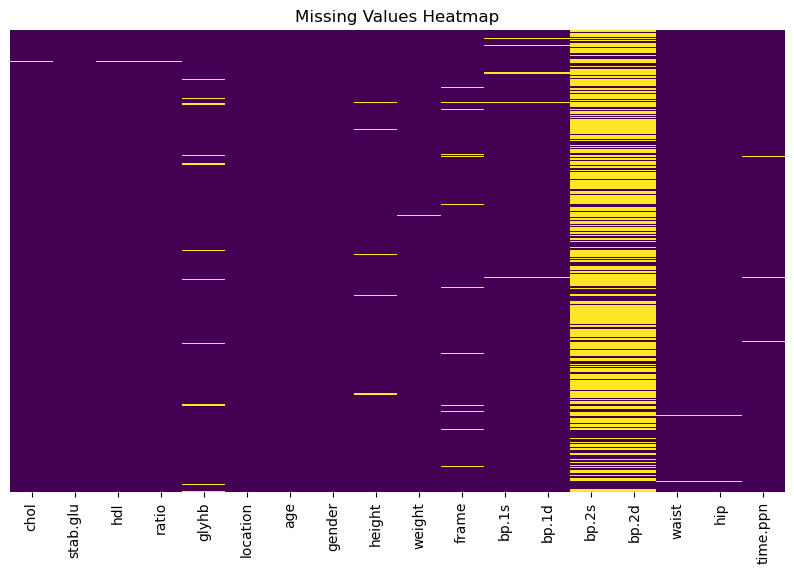

In [8]:
#draw missing value heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
#drop highest missing value variable 
df = df.drop(columns=['bp.2s', 'bp.2d'])

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


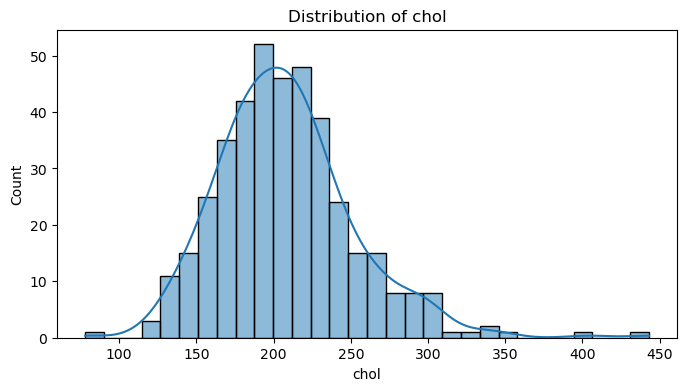

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


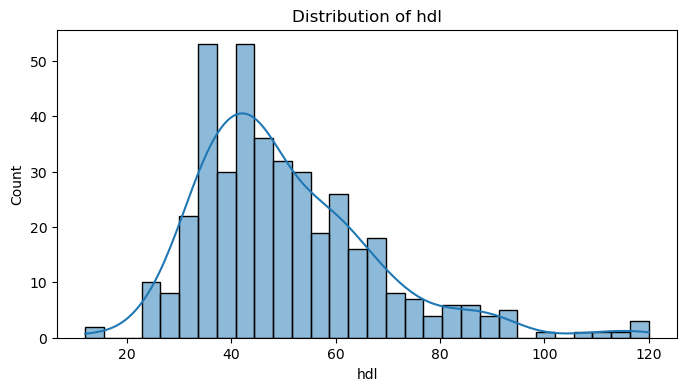

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


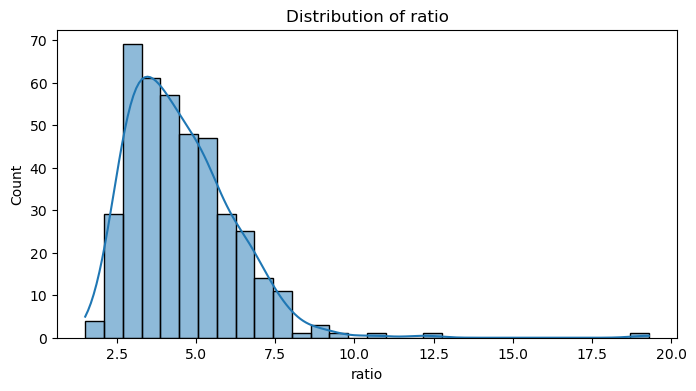

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


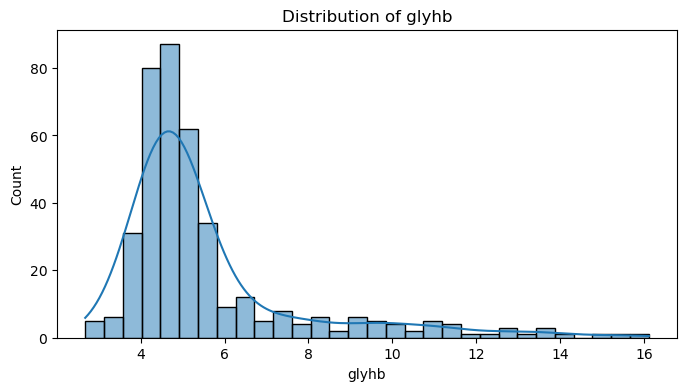

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


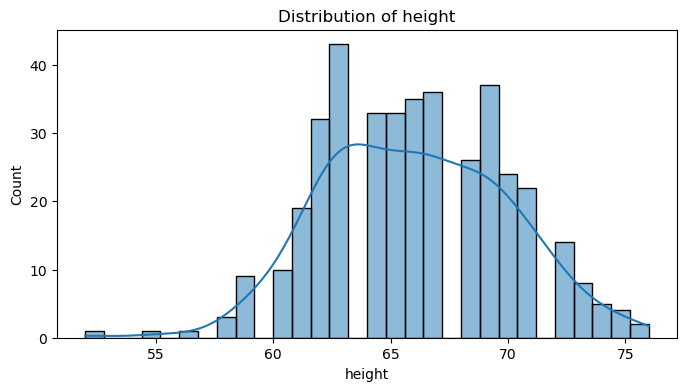

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


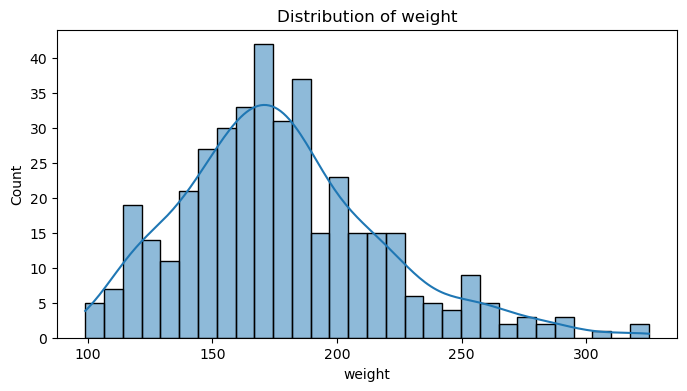

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


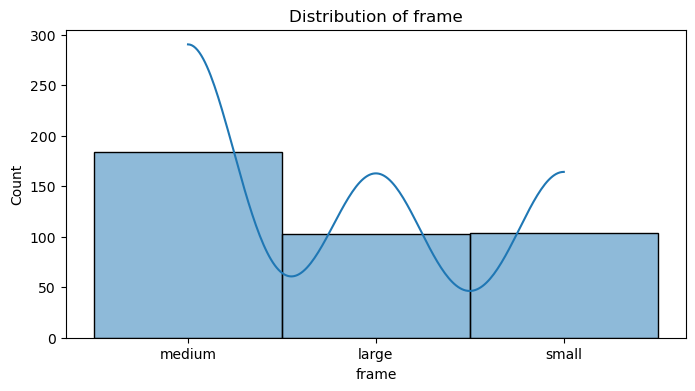

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


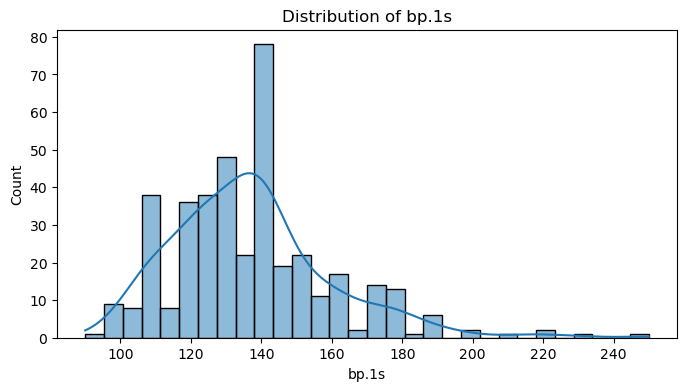

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


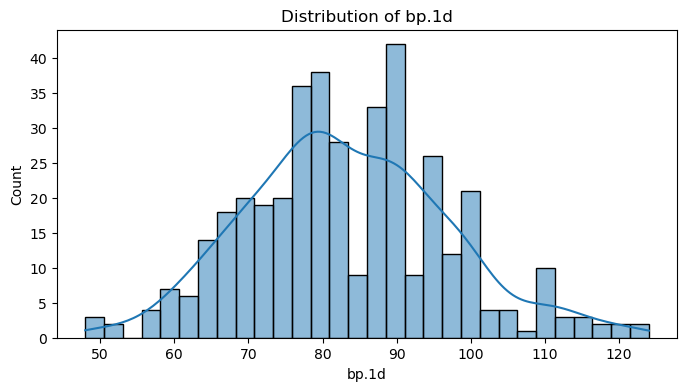

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


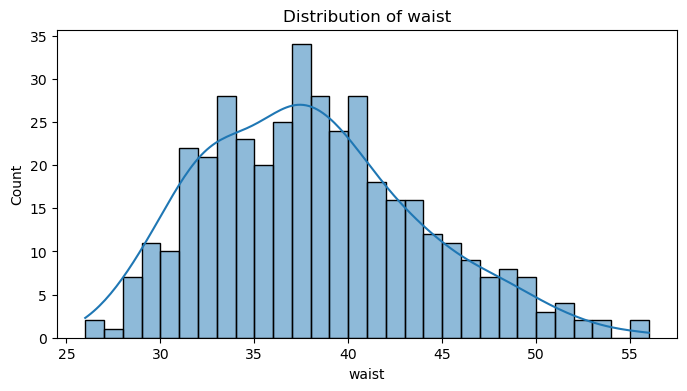

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


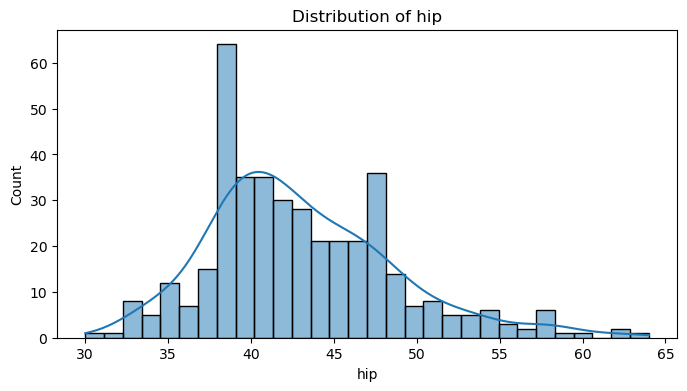

C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


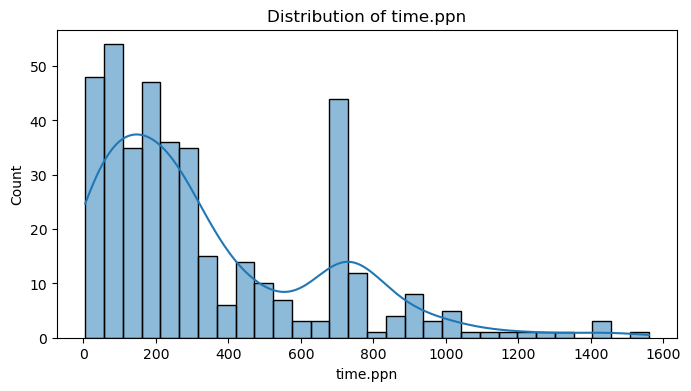

In [10]:
#check the distribution of columns for numerical column
# Identify columns with missing values
num_cols_with_na = df.columns[df.isnull().any()].tolist()
for col in num_cols_with_na:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()



In [11]:
# Find numerical columns with missing values
num_cols_with_null = df.columns[df.isnull().sum() > 0]  # Get columns with NaN
num_cols_with_null = df[num_cols_with_null].select_dtypes(include=[np.number]).columns  # Keep only numeric ones

# Compute skewness for these columns
skew_values = df[num_cols_with_null].skew()

# Print skewness
print("Skewness of Numerical Features with Missing Values:\n")
print(skew_values)

# Identify skewed columns (threshold = 0.5)
threshold = 0.5
skewed_cols = skew_values[abs(skew_values) > threshold].index

print("\nHighly Skewed Columns:")
print(skewed_cols)


Skewness of Numerical Features with Missing Values:

chol        0.930048
hdl         1.196666
ratio       2.212431
glyhb       2.246125
height      0.028040
weight      0.726112
bp.1s       1.110359
bp.1d       0.272454
waist       0.471359
hip         0.803650
time.ppn    1.212838
dtype: float64

Highly Skewed Columns:
Index(['chol', 'hdl', 'ratio', 'glyhb', 'weight', 'bp.1s', 'hip', 'time.ppn'], dtype='object')


In [12]:
# Fill missing values based on skewness
for col in num_cols_with_null:
    if col in skewed_cols:
        df[col].fillna(df[col].median(), inplace=True)  # Use median for skewed data
    else:
        df[col].fillna(df[col].mean(), inplace=True)  # Use mean for normally distributed data

# Verify all missing values are handled
print("\nMissing values after imputation:\n", df[num_cols_with_null].isnull().sum())


Missing values after imputation:
 chol        0
hdl         0
ratio       0
glyhb       0
height      0
weight      0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64


In [13]:
# Find categorical columns with missing values
cat_cols_with_null = df.select_dtypes(include=['object', 'category']).columns
missing_cat_values = df[cat_cols_with_null].isnull().sum()

# Display only columns with missing values
missing_cat_values = missing_cat_values[missing_cat_values > 0]
print("Missing values in categorical columns:\n", missing_cat_values)



Missing values in categorical columns:
 frame    12
dtype: int64


In [14]:
for col in missing_cat_values.index:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the most frequent value

# Verify all missing values are handled
print("\nMissing values after imputation:\n", df[cat_cols_with_null].isnull().sum())




Missing values after imputation:
 location    0
gender      0
frame       0
dtype: int64


In [15]:
#check all missing value are handled
print(df.isnull().sum())

chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
dtype: int64


In [16]:
#separate feature and target for regression task
# Features (independent variables)
X_regression = df.drop(columns=["glyhb"])

# Target (dependent variable)
y_regression = df["glyhb"]

# Display shapes
print("Features shape:", X_regression.shape)
print("Target shape:", y_regression.shape)



Features shape: (403, 15)
Target shape: (403,)


In [17]:
print("Regression Features:")
print(X_regression.head())

print("\nRegression Target:")
print(y_regression.head())



Regression Features:
    chol  stab.glu   hdl  ratio    location  age  gender  height  weight  \
0  203.0        82  56.0    3.6  Buckingham   46  female    62.0   121.0   
1  165.0        97  24.0    6.9  Buckingham   29  female    64.0   218.0   
2  228.0        92  37.0    6.2  Buckingham   58  female    61.0   256.0   
3   78.0        93  12.0    6.5  Buckingham   67    male    67.0   119.0   
4  249.0        90  28.0    8.9  Buckingham   64    male    68.0   183.0   

    frame  bp.1s  bp.1d  waist   hip  time.ppn  
0  medium  118.0   59.0   29.0  38.0     720.0  
1   large  112.0   68.0   46.0  48.0     360.0  
2   large  190.0   92.0   49.0  57.0     180.0  
3   large  110.0   50.0   33.0  38.0     480.0  
4  medium  138.0   80.0   44.0  41.0     300.0  

Regression Target:
0    4.31
1    4.44
2    4.64
3    4.63
4    7.72
Name: glyhb, dtype: float64


In [18]:
# Save regression data
X_regression.to_csv("regression_features.csv", index=False)
y_regression.to_csv("regression_target.csv", index=False)


In [19]:
# Perform train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Display shapes
print("Regression Training Features:", X_train_reg.shape)
print("Regression Testing Features:", X_test_reg.shape)
print("Regression Training Target:", y_train_reg.shape)
print("Regression Testing Target:", y_test_reg.shape)


Regression Training Features: (322, 15)
Regression Testing Features: (81, 15)
Regression Training Target: (322,)
Regression Testing Target: (81,)


In [20]:
# Step 4: Feature Transformation
num_features = X_regression.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_regression.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


In [21]:
# Apply the transformation to the training data
X_train_transformed = preprocessor.fit_transform(X_train_reg)

# Convert transformed data into a DataFrame
transformed_columns = (
    num_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features))
)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)

# Display transformed dataset
print(X_train_transformed_df.head())


       chol  stab.glu       hdl     ratio       age    height    weight  \
0 -0.060564 -0.442587  0.997985 -0.893735  0.307342  0.748557 -0.584205   
1 -0.278458  0.208064  0.663360 -0.781121  0.183868  0.243210 -0.905324   
2 -2.849608 -0.239258 -2.125178  1.076993  1.233393  0.243210 -1.424054   
3 -0.322037 -0.483253 -0.786679  0.457621 -0.680446 -0.514811 -1.251144   
4 -0.452773 -0.564584 -0.284743 -0.218057 -0.989130  0.243210  1.243703   

      bp.1s     bp.1d     waist       hip  time.ppn  location_Buckingham  \
0  0.125869  1.084820 -0.300731 -0.493150 -0.468215                  0.0   
1  1.666607  1.963705 -0.473404 -1.020705 -0.889566                  0.0   
2 -1.158078 -2.430718 -0.818751 -0.844853  0.421302                  1.0   
3 -1.158078 -0.526468 -1.336772 -1.548260 -0.702299                  0.0   
4 -0.644499 -0.965911  1.598677  1.792924 -0.639877                  0.0   

   location_Louisa  gender_female  gender_male  frame_large  frame_medium  \
0              

In [22]:
# Step 5: Train and Evaluate Linear Regression Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train_reg, y_train_reg)  # Train the model
y_pred = pipeline.predict(X_test_reg)  # Make predictions


In [23]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test_reg, y_pred)
mse = mean_squared_error(y_test_reg, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred)

print("🔹 Linear Regression Performance:")
print(f"   MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}\n")

🔹 Linear Regression Performance:
   MAE: 0.7221, RMSE: 1.0077, R² Score: 0.8118



C:\Users\13309\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


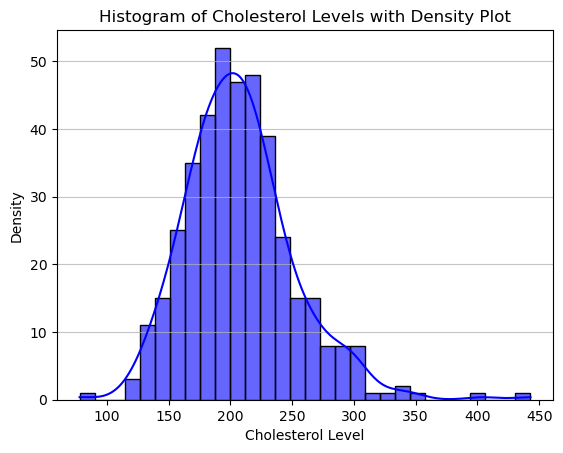

In [48]:
sns.histplot(df['chol'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Histogram of Cholesterol Levels with Density Plot')
plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [26]:
#classification

In [27]:
# Assuming 'data' is your DataFrame and it already contains a column 'glyhb'
threshold_value = 6.5  # Example threshold for diabetes

In [28]:
# Create a binary target variable for diabetes
df['diabetes'] = (df['glyhb'] > threshold_value).astype(int)

In [29]:
# Display the updated DataFrame
df

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetes
0,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,0
1,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,0
2,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,0
3,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,0
4,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,1
399,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,0
400,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,1
401,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0,0


In [30]:
# Apply one-hot encoding
df['gender'] = df['gender'].map({'male': 0, 'female': 1})

In [31]:
df['location'] = df['location'].map({'Buckingham': 0, 'Louisa': 1})

In [32]:
df

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetes
0,203.0,82,56.0,3.6,4.310000,0,46,1,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,0
1,165.0,97,24.0,6.9,4.440000,0,29,1,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,0
2,228.0,92,37.0,6.2,4.640000,0,58,1,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,0
3,78.0,93,12.0,6.5,4.630000,0,67,0,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,0
4,249.0,90,28.0,8.9,7.720000,0,64,0,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,1,53,0,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,1
399,284.0,89,54.0,5.3,4.390000,1,51,1,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,0
400,194.0,269,38.0,5.1,13.630000,1,29,1,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,1
401,199.0,76,52.0,3.8,4.490000,1,41,1,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0,0


In [33]:
df['frame'] = df['frame'].map({'small': 0, 'medium': 1, 'large':2})

In [34]:
df

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetes
0,203.0,82,56.0,3.6,4.310000,0,46,1,62.0,121.0,1,118.0,59.0,29.0,38.0,720.0,0
1,165.0,97,24.0,6.9,4.440000,0,29,1,64.0,218.0,2,112.0,68.0,46.0,48.0,360.0,0
2,228.0,92,37.0,6.2,4.640000,0,58,1,61.0,256.0,2,190.0,92.0,49.0,57.0,180.0,0
3,78.0,93,12.0,6.5,4.630000,0,67,0,67.0,119.0,2,110.0,50.0,33.0,38.0,480.0,0
4,249.0,90,28.0,8.9,7.720000,0,64,0,68.0,183.0,1,138.0,80.0,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,16.110001,1,53,0,69.0,173.0,1,138.0,94.0,35.0,39.0,210.0,1
399,284.0,89,54.0,5.3,4.390000,1,51,1,63.0,154.0,1,140.0,100.0,32.0,43.0,180.0,0
400,194.0,269,38.0,5.1,13.630000,1,29,1,69.0,167.0,0,120.0,70.0,33.0,40.0,20.0,1
401,199.0,76,52.0,3.8,4.490000,1,41,1,63.0,197.0,1,120.0,78.0,41.0,48.0,255.0,0


In [35]:
X = df.drop(columns=['glyhb', 'diabetes'])  # Features
y = df['diabetes']  # Target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# Step 3: Feature Transformation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Step 4: Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
# Step 5: Make Predictions
y_pred = logistic_model.predict(X_test_scaled)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display Results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9629629629629629
Confusion Matrix:
[[69  0]
 [ 3  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.75      0.86        12

    accuracy                           0.96        81
   macro avg       0.98      0.88      0.92        81
weighted avg       0.96      0.96      0.96        81



In [42]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.236411
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  322
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                           15
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.4714
Time:                        10:17:48   Log-Likelihood:                -76.124
converged:                       True   LL-Null:                       -144.00
Covariance Type:            nonrobust   LLR p-value:                 1.577e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5776      7.067     -1.072      0.284     -21.429       6.273
chol           0.0092      0.

Optimization terminated successfully.
         Current function value: 0.211004
         Iterations 8


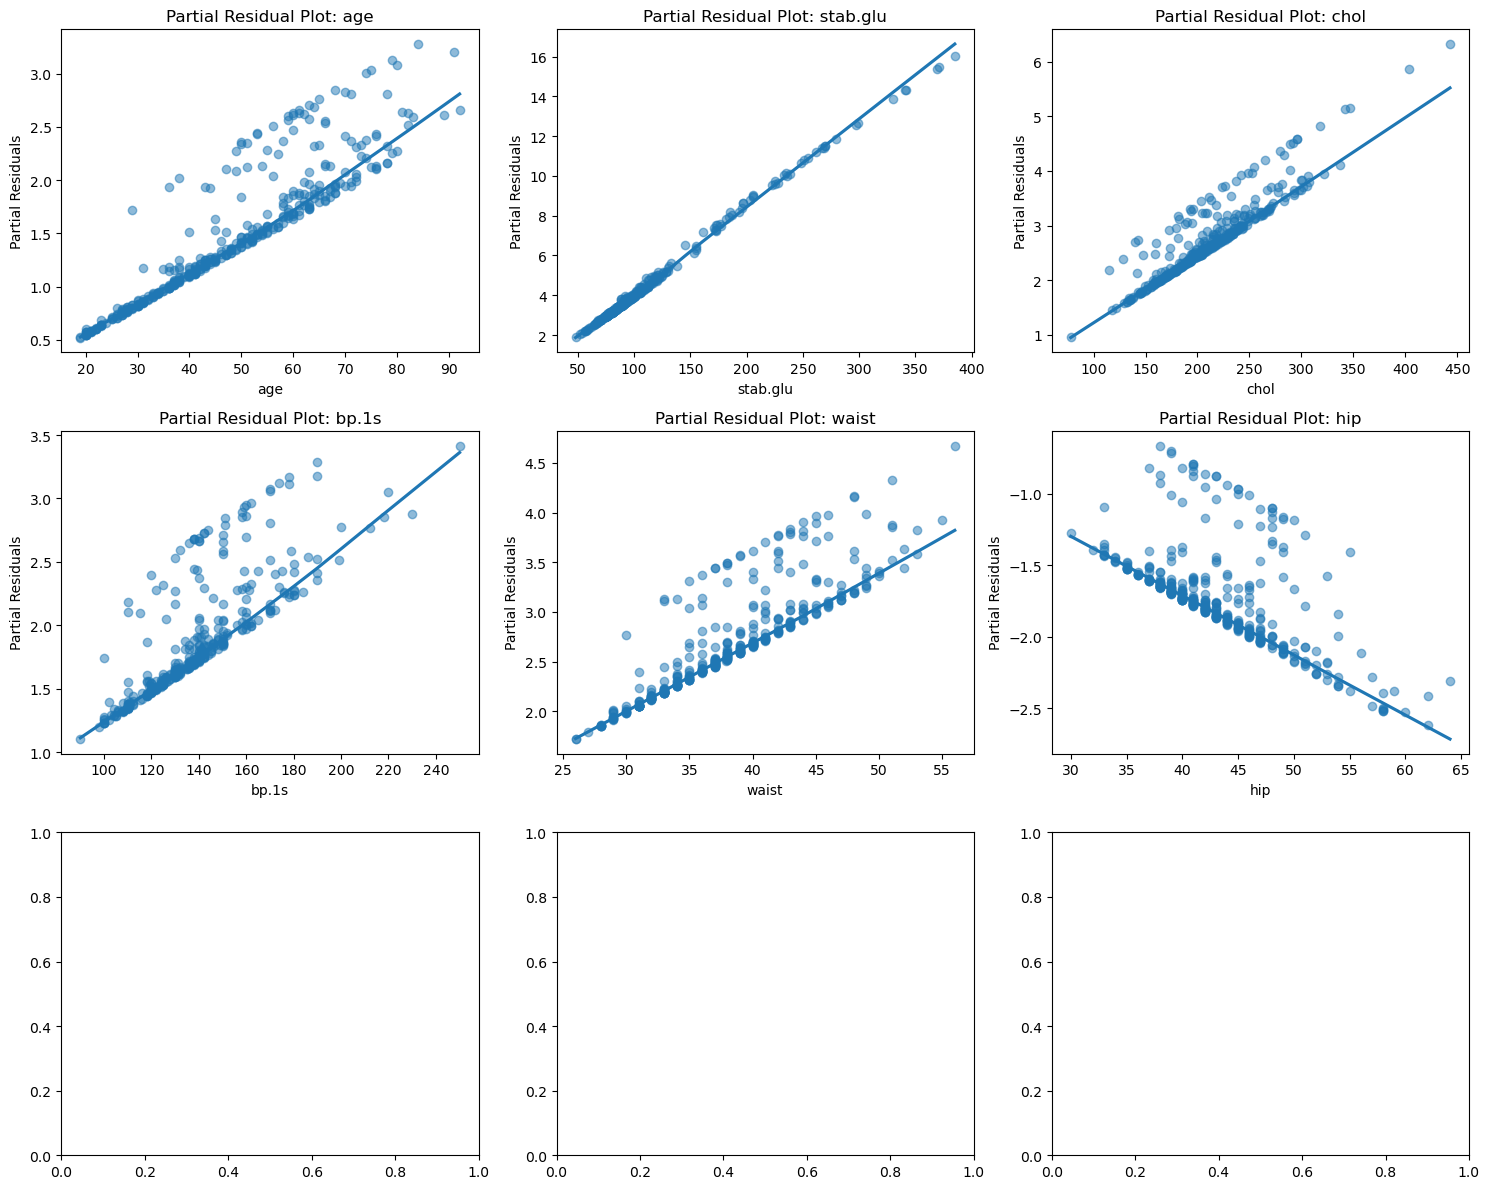

In [41]:
# Fit logistic regression model
X_const = sm.add_constant(X)  # Add constant for intercept
logit_model = sm.Logit(y, X_const).fit()

# Get predicted log-odds
log_odds = logit_model.predict(X_const)

# Plot partial residuals for each predictor
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust grid based on number of features
for i, col in enumerate(["age", "stab.glu", "chol", "bp.1s", "waist", "hip"]):  # Choose continuous variables
    row, col_idx = divmod(i, 3)
    
    # Compute partial residuals
    partial_residuals = X[col] * logit_model.params[col] + log_odds
    
    # Plot
    sns.regplot(x=X[col], y=partial_residuals, ax=axes[row, col_idx], lowess=True, scatter_kws={"alpha": 0.5})
    axes[row, col_idx].set_title(f"Partial Residual Plot: {col}")
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel("Partial Residuals")

plt.tight_layout()
plt.show()


In [44]:
from statsmodels.stats.stattools import durbin_watson
# check auto correlation
# Compute Durbin-Watson statistic
dw_stat = durbin_watson(log_reg.resid_response)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 2.056232894322476


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9629629629629629
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
